In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import astropy.units as u

This notebook is complementary to the one on Coupling Capacitance to Ground Calculations. The basic question I seek to answer here is how much of a hit in coupling efficiency do we take when we add extra capacitance to ground.

Just some definitions for future reference
* $Q_i$ - Internal quality factor for the resonator
* $C_1$ - coupling capacitance to the feedline
* $L$ - Inductance of the resonator. Sum of the geometric and the kinetic inductance
* $Z_0$ - Line Impedance

In [2]:
# Determined from calculations + simulations of the resobolo at T=0.38K
Qi = 11492.87
C1 = 0.20 * u.pF
L = 9.99 * u.nH
Z0 = 50 * u.Ohm

In [30]:
# Give a range of relative sizes between C2 and C1 based on the possible values of C2 for resonances in the range
# 200 - 450 MHz
C2 = np.r_[0.1:50:1000j] * C1

In [31]:
Cc = 1/(1/C1 + 1/C2)

In [32]:
# Take Ci to give a resonant peak at 300 MHz
f_r = 300 * u.MHz
omega_r = (2*np.pi * f_r).to('1/s')
Ci = (1/(L * omega_r**2)).to('pF')
print (Ci)

28.172946180162878 pF


In [33]:
Qc = ((2*Ci)/(Z0 * omega_r * Cc**2)).to(1)
rho_c = Qc/Qi

chi_c = (4 * rho_c)/(1 + rho_c)**2

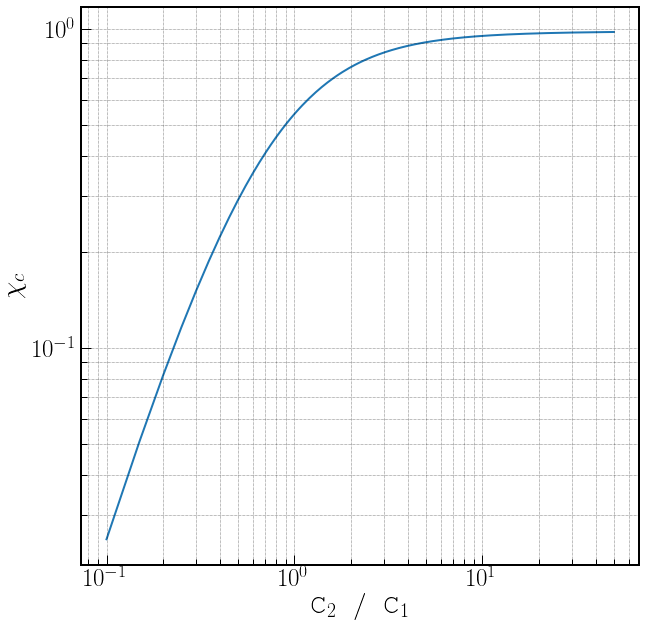

In [34]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.loglog((C2/C1).to(1), chi_c)
ax.set_xlabel(r'$\texttt{C}_2 \ / \ \texttt{C}_1$ ');
ax.set_ylabel(r'$\chi_c$')
# ax.xaxis.set_major_formatter(cap_xaxis_formatter)
# ax.xaxis.set_major_formatter(freq_formatter)
ax.grid('on', which= 'both');